In [1]:
!git clone https://github.com/ultralytics/ultralytics

Cloning into 'ultralytics'...
remote: Enumerating objects: 30639, done.
remote: Counting objects: 100% (1095/1095), done.
remote: Compressing objects: 100% (685/685), done.
remote: Total 30639 (delta 703), reused 683 (delta 406), pack-reused 29544
Receiving objects: 100% (30639/30639), 15.82 MiB | 2.53 MiB/s, done.
Resolving deltas: 100% (21989/21989), done.


In [3]:
%cd ultralytics

/home/areebadnankhan/code/work/Atheritia/ultralytics


In [3]:
!git reset --hard abd391b63338b79cebee808b6679498dcc94956f

HEAD is now at abd391b6 `ultralytics 8.2.55` adaptive `tflite_support` logic (#14385)


In [4]:
 #Download patch
!wget https://gist.githubusercontent.com/Y-T-G/8f4fc0b78a0a559a06fe84ae4f359e6e/raw/05a9086de3825e15ebef3830229273982c3ad9ec/add_head.patch

--2024-07-22 19:31:40--  https://gist.githubusercontent.com/Y-T-G/8f4fc0b78a0a559a06fe84ae4f359e6e/raw/05a9086de3825e15ebef3830229273982c3ad9ec/add_head.patch
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11258 (11K) [text/plain]
Saving to: ‘add_head.patch’

add_head.patch      100%[===================>]  10.99K  --.-KB/s    in 0s      

2024-07-22 19:31:41 (187 MB/s) - ‘add_head.patch’ saved [11258/11258]



In [5]:
!git apply add_head.patch

In [6]:
%pwd
%cd ..
%cd ultralytics

/home/areebadnan/Areeb_code/work/Atheritia
/home/areebadnan/Areeb_code/work/Atheritia/ultralytics


/home/areebadnan/Areeb_Python_Environments/yolo_env1/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [7]:
from ultralytics import YOLO
import torch
import copy


# Initialize pretrained model
#model = YOLO('yolov8n.pt')

model = YOLO("/home/areebadnan/Areeb_code/work/Atheritia/All_models/Nano/yolov8n_5logos_22freezed_withBN.pt")

# Keep a copy of old state dict for sanity check
old_dict = copy.deepcopy(model.state_dict())

# We should freeze all but the last layer
model.state_dict().keys()

odict_keys(['model.model.0.conv.weight', 'model.model.0.bn.weight', 'model.model.0.bn.bias', 'model.model.0.bn.running_mean', 'model.model.0.bn.running_var', 'model.model.0.bn.num_batches_tracked', 'model.model.1.conv.weight', 'model.model.1.bn.weight', 'model.model.1.bn.bias', 'model.model.1.bn.running_mean', 'model.model.1.bn.running_var', 'model.model.1.bn.num_batches_tracked', 'model.model.2.cv1.conv.weight', 'model.model.2.cv1.bn.weight', 'model.model.2.cv1.bn.bias', 'model.model.2.cv1.bn.running_mean', 'model.model.2.cv1.bn.running_var', 'model.model.2.cv1.bn.num_batches_tracked', 'model.model.2.cv2.conv.weight', 'model.model.2.cv2.bn.weight', 'model.model.2.cv2.bn.bias', 'model.model.2.cv2.bn.running_mean', 'model.model.2.cv2.bn.running_var', 'model.model.2.cv2.bn.num_batches_tracked', 'model.model.2.m.0.cv1.conv.weight', 'model.model.2.m.0.cv1.bn.weight', 'model.model.2.m.0.cv1.bn.bias', 'model.model.2.m.0.cv1.bn.running_mean', 'model.model.2.m.0.cv1.bn.running_var', 'model.mod

In [8]:
# for name, module in model.model.named_modules():
#     print(f"Layer: {name}, Module: {module}")


In [5]:
# Add a callback to put the frozen layers in eval mode to prevent BN values
# from changing.
def put_in_eval_mode(trainer, n_layers=22):
  for i, (name, module) in enumerate(trainer.model.named_modules()):
    if name.endswith("bn") and int(name.split('.')[1]) < n_layers:
      module.eval()
      module.track_running_stats = False
      # print(name, " put in eval mode.")

In [6]:
model.add_callback("on_train_epoch_start", put_in_eval_mode)
model.add_callback("on_pretrain_routine_start", put_in_eval_mode)

In [9]:
def compare_dicts(state_dict1, state_dict2):
    # Compare the keys
    keys1 = set(state_dict1.keys())
    keys2 = set(state_dict2.keys())

    if keys1 != keys2:
        print("Models have different parameter names.")
        return False

    # Compare the values (weights)
    for key in keys1:
        if not torch.equal(state_dict1[key], state_dict2[key]):
            print(f"Weights for parameter '{key}' are different.")
            if "bn" in key and "22" not in key:
              state_dict1[key] = state_dict2[key]

In [10]:
new_model = YOLO("/home/areebadnan/Areeb_code/work/Atheritia/All_models/Nano/yolov8n_3logos_22freezed_withBN.pt")

#new_model = YOLO("yolov8n.pt")

new_model.state_dict().items()

odict_items([('model.model.0.conv.weight', tensor([[[[-1.1523e-01, -1.0582e-02,  1.0693e-01],
          [-3.6816e-01,  3.3447e-02,  3.8745e-01],
          [-3.3716e-01, -1.3680e-02,  3.1201e-01]],

         [[-1.4233e-01,  9.7656e-03,  1.5222e-01],
          [-4.8999e-01,  2.7908e-02,  4.6021e-01],
          [-3.7256e-01, -2.7542e-03,  3.4814e-01]],

         [[-4.9866e-02, -1.4900e-02,  2.4887e-02],
          [-2.1375e-01,  3.2898e-02,  1.9385e-01],
          [-1.5344e-01,  3.1113e-02,  1.5649e-01]]],


        [[[ 1.2283e-02,  1.8890e-02,  8.2321e-03],
          [-2.7218e-03, -2.3987e-02,  2.9926e-03],
          [-1.7059e-02, -1.4148e-01, -1.7426e-02]],

         [[-9.5062e-03,  1.2146e-02,  8.6975e-04],
          [-7.3242e-03, -2.6993e-02, -5.9357e-03],
          [-2.0844e-02, -1.4062e-01, -2.2461e-02]],

         [[-1.9436e-03,  4.3182e-03, -3.6392e-03],
          [ 3.4027e-03, -8.4229e-03,  6.2981e-03],
          [ 1.0201e-02, -6.1340e-02,  1.8524e-02]]],


        [[[-1.0460e-02,

In [11]:
# for name, module in new_model.model.named_modules():
#     print(f"Layer: {name}, Module: {module}")


In [12]:
# Compare the dicts. Changes should only be in layer 21 and above
compare_dicts(old_dict, new_model.state_dict())

Weights for parameter 'model.model.22.cv2.2.0.conv.weight' are different.
Weights for parameter 'model.model.22.cv3.0.2.bias' are different.
Weights for parameter 'model.model.22.cv3.1.1.bn.weight' are different.
Weights for parameter 'model.model.22.cv3.1.1.bn.running_mean' are different.
Weights for parameter 'model.model.22.cv2.1.1.conv.weight' are different.
Weights for parameter 'model.model.22.cv2.0.0.bn.weight' are different.
Weights for parameter 'model.model.22.cv2.2.0.bn.weight' are different.
Weights for parameter 'model.model.22.cv2.2.0.bn.running_mean' are different.
Weights for parameter 'model.model.22.cv3.0.0.bn.bias' are different.
Weights for parameter 'model.model.22.cv2.0.1.bn.running_var' are different.
Weights for parameter 'model.model.22.cv3.2.0.bn.bias' are different.
Weights for parameter 'model.model.22.cv3.1.0.bn.running_var' are different.
Weights for parameter 'model.model.22.cv3.1.1.bn.bias' are different.
Weights for parameter 'model.model.22.cv3.0.0.bn.

In [13]:
new_state_dict = dict()

In [14]:
#  Increment the head number by 1 in the state_dict
for k, v in new_model.state_dict().items():
  if k.startswith("model.model.22"):
    new_state_dict[k.replace("model.22", "model.23")] = v
  # else:
  #   new_state_dict[k] = v

In [15]:
new_state_dict

{'model.model.23.cv2.0.0.conv.weight': tensor([[[[ 9.0027e-02, -5.2887e-02, -3.5034e-02],
           [-8.8745e-02,  1.5149e-01,  1.0736e-01],
           [-5.9570e-02, -6.2988e-02,  9.5947e-02]],
 
          [[-1.0638e-01,  3.5461e-02,  5.8075e-02],
           [ 2.4341e-01, -8.3191e-02,  1.5266e-02],
           [-9.4681e-03, -1.4702e-02, -6.4758e-02]],
 
          [[-1.0841e-02, -6.8237e-02, -5.3978e-03],
           [ 2.1210e-02, -7.8674e-02,  6.8665e-02],
           [-2.2757e-04, -2.6611e-02,  1.3330e-01]],
 
          ...,
 
          [[ 1.3428e-01, -1.6205e-02, -6.5491e-02],
           [-6.3210e-03,  4.2145e-02,  1.0541e-01],
           [-1.2152e-01,  2.7283e-02,  5.7526e-02]],
 
          [[-1.3525e-01, -9.2224e-02, -6.9122e-03],
           [ 6.4148e-02, -1.0602e-01, -1.0266e-01],
           [ 7.8796e-02,  1.8298e-01,  1.0339e-01]],
 
          [[-3.9673e-02,  4.4800e-02,  2.9163e-03],
           [-4.0558e-02,  2.0996e-02,  4.2450e-02],
           [ 2.6901e-02,  1.1011e-01,  6.0425e

In [16]:
new_state_dict['model.model.23.cv2.0.0.conv.weight'].shape


torch.Size([64, 64, 3, 3])

In [17]:
# Save the current state_dict
torch.save(new_state_dict, "yolov8n_lp.pth")

In [18]:
from ultralytics import YOLO
import torch

In [19]:
import os

# Get the current working directory
current_directory = os.getcwd()

print("Current working directory:", current_directory)

Current working directory: /home/areebadnan/Areeb_code/work/Atheritia/ultralytics


In [18]:
# Edit this to the number of new classes you added
added_classes = 3 # Added 2 new classes.
nc = 80 + added_classes # Total no. of classes

# Update yaml with the number of added_classes
!sed -i "52s/.*/  - \[\[15, 18, 21\], 1, Detect, \[{added_classes}\]\]/g" ultralytics/cfg/models/v8/yolov8n-2xhead.yaml
!sed -i "5s/.*/nc: {nc}/g" ultralytics/cfg/models/v8/yolov8n-2xhead.yaml

In [20]:
#model_2 = YOLO('ultralytics/cfg/models/v8/yolov8n-2xhead.yaml', task="detect").load('yolov8n.pt')

model_2 = YOLO('ultralytics/cfg/models/v8/yolov8n-2xhead.yaml', task="detect").load('/home/areebadnan/Areeb_code/work/Atheritia/All_models/Nano/yolov8n_5logos_22freezed_withBN.pt')

Transferred 355/440 items from pretrained weights


In [21]:
model_2

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

In [22]:
%pwd
%cd ultralytics

/home/areebadnan/Areeb_code/work/Atheritia/ultralytics/ultralytics


In [24]:
%cd ..

/home/areebadnan/Areeb_code/work/Atheritia/ultralytics


/home/areebadnan/Areeb_Python_Environments/yolo_env1/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [25]:
state_dict = torch.load("yolov8n_lp.pth")

# Load state_dict of the custom trained model head. Layer 23.
model_2.load_state_dict(state_dict, strict=False)

/tmp/ipykernel_5798/839733014.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load("yolov8n_lp.pth")


_IncompatibleKeys(missing_keys=['model.model.0.conv.weight', 'model.model.0.bn.weight', 'model.model.0.bn.bias', 'model.model.0.bn.running_mean', 'model.model.0.bn.running_var', 'model.model.1.conv.weight', 'model.model.1.bn.weight', 'model.model.1.bn.bias', 'model.model.1.bn.running_mean', 'model.model.1.bn.running_var', 'model.model.2.cv1.conv.weight', 'model.model.2.cv1.bn.weight', 'model.model.2.cv1.bn.bias', 'model.model.2.cv1.bn.running_mean', 'model.model.2.cv1.bn.running_var', 'model.model.2.cv2.conv.weight', 'model.model.2.cv2.bn.weight', 'model.model.2.cv2.bn.bias', 'model.model.2.cv2.bn.running_mean', 'model.model.2.cv2.bn.running_var', 'model.model.2.m.0.cv1.conv.weight', 'model.model.2.m.0.cv1.bn.weight', 'model.model.2.m.0.cv1.bn.bias', 'model.model.2.m.0.cv1.bn.running_mean', 'model.model.2.m.0.cv1.bn.running_var', 'model.model.2.m.0.cv2.conv.weight', 'model.model.2.m.0.cv2.bn.weight', 'model.model.2.m.0.cv2.bn.bias', 'model.model.2.m.0.cv2.bn.running_mean', 'model.model

In [76]:
%cd ..

/home/areebadnan/Areeb_code/work/Atheritia


In [26]:
# Output of COCO model
model_coco = YOLO("/home/areebadnan/Areeb_code/work/Atheritia/All_models/Nano/yolov8n_5logos_22freezed_withBN.pt")

# For consistency
model_coco.model.names = {k:k for k in model_coco.names.keys()}

result_coco = model_coco.predict("/home/areebadnan/Areeb_code/work/Atheritia/merged_images/pic2.jpg")[0]

/home/areebadnan/Areeb_code/work/Atheritia/ultralytics/ultralytics/nn/tasks.py:785: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")


image 1/1 /home/areebadnan/Areeb_code/work/Atheritia/merged_images/pic2.jpg: 640x640 1 1, 2.4ms
Speed: 2.0ms preprocess, 2.4ms inference, 263.6ms postprocess per image at shape (1, 3, 640, 640)


In [27]:
# Output of custom LP model
model_lp = YOLO("/home/areebadnan/Areeb_code/work/Atheritia/All_models/Nano/yolov8n_3logos_22freezed_withBN.pt")

# For plotting consistency, change all class names to class numbers
model_lp.model.names = {k:k for k in model_lp.names.keys()}

result_lp = model_lp.predict("/home/areebadnan/Areeb_code/work/Atheritia/merged_images/pic2.jpg")[0]


image 1/1 /home/areebadnan/Areeb_code/work/Atheritia/merged_images/pic2.jpg: 640x640 1 0, 2.4ms
Speed: 1.9ms preprocess, 2.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


/home/areebadnan/Areeb_code/work/Atheritia/ultralytics/ultralytics/nn/tasks.py:785: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")

In [28]:
# Output of the new model
result_merged = model_2.predict("/home/areebadnan/Areeb_code/work/Atheritia/merged_images/pic2.jpg")[0]


torch.Size([1, 9, 8400])
torch.Size([1, 7, 8400])
torch.Size([1, 9, 8400])
torch.Size([1, 7, 8400])
image 1/1 /home/areebadnan/Areeb_code/work/Atheritia/merged_images/pic2.jpg: 640x640 1 1, 1 5, 3.1ms
Speed: 1.7ms preprocess, 3.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


In [29]:
import matplotlib.pyplot as plt
import numpy as np

In [30]:
def show_output(images):
    image = np.vstack(images)
    fig = plt.figure()
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    fig.set_size_inches((5,15))
    ax.imshow(image[...,::-1])

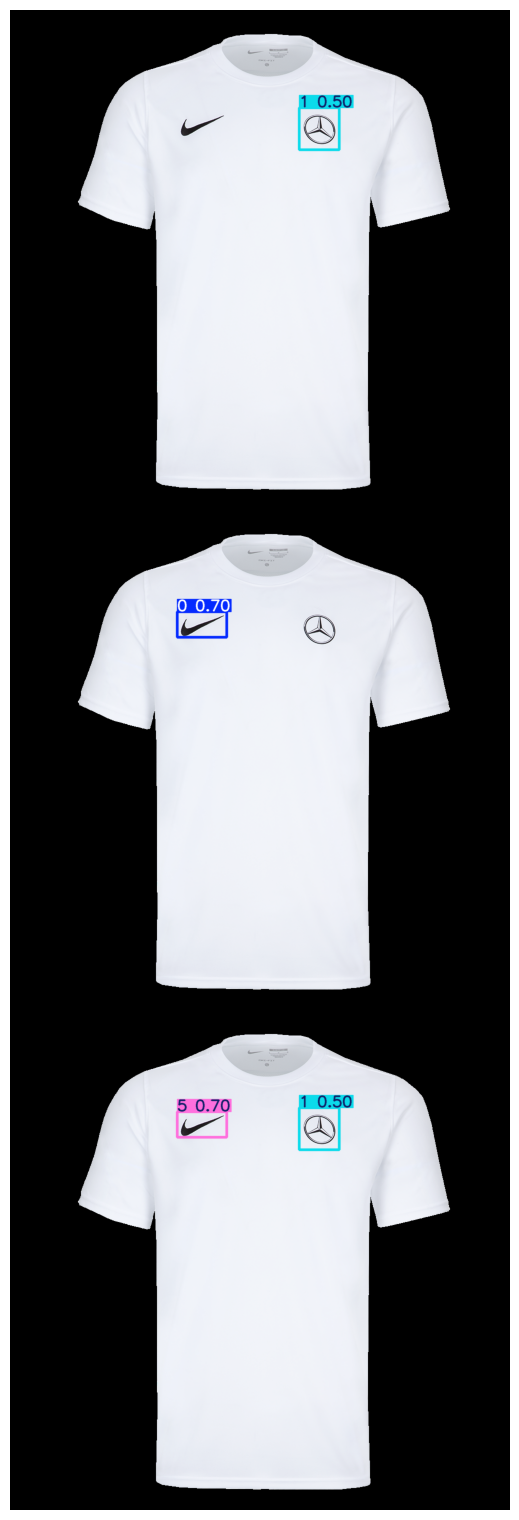

In [31]:
show_output([result_coco.plot(), result_lp.plot(), result_merged.plot()])